## **Homework - Session 6**

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column 'price').

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv) or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv) if you don't want to sign up to Kaggle.

Let's load the data:

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [76]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Fill NAs with 0
* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1
* Use `DictVectorizer` to turn the dataframe into matrices

In [38]:
df.head(1)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365


In [78]:
# Apply the log tranform to `price`
df['price_log'] = np.log1p(df.price)

In [40]:
df.price[0:2]

0    149
1    225
Name: price, dtype: int64

In [41]:
df.price_log[0:2]

0    5.010635
1    5.420535
Name: price_log, dtype: float64

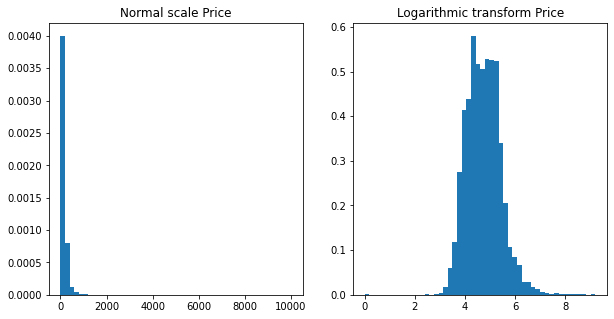

In [101]:
# Graph

plt.rcParams["figure.figsize"] = (10,5)

fig, axes = plt.subplots(1, 2)   
axes[0].hist(df['price'], density= True, bins = 50)
axes[0].set_title("Normal scale Price")

axes[1].hist(df['price_log'], density= True, bins = 50)
axes[1].set_title("Logarithmic transform Price");

In [43]:
# Do train/validation/test split with 60%/20%/20% distribution
# Use the `train_test_split` function and set the `random_state` parameter to 1
from sklearn.model_selection import train_test_split

y = df.price_log 
X = df.drop(['price', 'price_log'], axis=1)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)

In [44]:
print('price' in X_train)
print('price' in X_test)
print('price' in X_val)
print('price_log' in X_train)
print('price_log' in X_test)
print('price_log' in X_val)


False
False
False
False
False
False


In [45]:
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [46]:
print('price_log' in df_train)
print('price_log' in df_val)
print('price_log' in df_test)

True
True
True


In [47]:
print(type(X_train))
print(type(X_test))
print(type(X_val))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [48]:
# Use `DictVectorizer` to turn the dataframe into matrices
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_test = dv.fit_transform(test_dict)
X_val = dv.transform(val_dict)

dv_features = dv.get_feature_names()

/home/vscode/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
print(type(train_dict), type(X_train))
print(type(test_dict), type(X_test))
print(type(val_dict), type(X_val))

<class 'list'> <class 'numpy.ndarray'>
<class 'list'> <class 'numpy.ndarray'>
<class 'list'> <class 'numpy.ndarray'>


In [57]:
print(dv_features)

['availability_365', 'calculated_host_listings_count', 'latitude', 'longitude', 'minimum_nights', 'neighbourhood_group=Bronx', 'neighbourhood_group=Brooklyn', 'neighbourhood_group=Manhattan', 'neighbourhood_group=Queens', 'neighbourhood_group=Staten Island', 'number_of_reviews', 'reviews_per_month', 'room_type=Entire home/apt', 'room_type=Private room', 'room_type=Shared room']


## **Question 1**

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [54]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



[Text(167.4, 163.07999999999998, 'room_type=Entire home/apt <= 0.5\nsquared_error = 0.485\nsamples = 29337\nvalue = 4.739'),
 Text(83.7, 54.360000000000014, 'squared_error = 0.284\nsamples = 14041\nvalue = 4.292'),
 Text(251.10000000000002, 54.360000000000014, 'squared_error = 0.319\nsamples = 15296\nvalue = 5.149')]

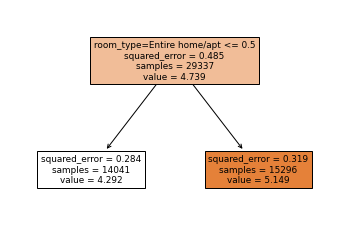

In [58]:
print(export_text(dt, feature_names=dv_features))
plot_tree(dt , filled = True , feature_names = dv_features)

**Which feature is used for splitting the data?**

* **`room_type`**
* neighbourhood_group
* number_of_reviews
* reviews_per_month

## **Question 2**

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)



In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

**What's the RMSE of this model on validation?**

* 0.059
* 0.259
* **0.459**
* 0.659

In [62]:
from sklearn.metrics import mean_squared_error as mse

y_pred_val = rf.predict(X_val)
rmse = np.sqrt(mse(y_val, y_pred_val))
rmse

0.4598535778342608

## **Question 3**

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [85]:
n_range = np.arange(10,201,10)
seed = 1
rmse_scores = {}

for v in n_range:
    rf = RandomForestRegressor(n_estimators=v, random_state=seed)
    rf.fit(X_train, y_train)
    y_pred_val = rf.predict(X_val)
    rmse_v = np.sqrt(mse(y_val, y_pred_val))
    rmse_scores[v] = rmse_v

print(rmse_scores)

{10: 0.4598535778342608, 20: 0.44783122647617707, 30: 0.44512003484498197, 40: 0.44322540476599925, 50: 0.4422309033499618, 60: 0.4415347874157756, 70: 0.4408665092520829, 80: 0.44076264110112295, 90: 0.4402436823066316, 100: 0.439782812295518, 110: 0.4393283276631756, 120: 0.439140100985395, 130: 0.4392600896545383, 140: 0.4391068172724505, 150: 0.4390987893907921, 160: 0.43891283738859316, 170: 0.43886569128153563, 180: 0.4390536136991923, 190: 0.4389458407581751, 200: 0.4389432007046648}


In [67]:
for k,v in rmse_scores.items():
    print(f"n_estimators={k} | RMSE={v}")

n_estimators=10 | RMSE=0.4598535778342608
n_estimators=20 | RMSE=0.44783122647617707
n_estimators=30 | RMSE=0.44512003484498197
n_estimators=40 | RMSE=0.44322540476599925
n_estimators=50 | RMSE=0.4422309033499618
n_estimators=60 | RMSE=0.4415347874157756
n_estimators=70 | RMSE=0.4408665092520829
n_estimators=80 | RMSE=0.44076264110112295
n_estimators=90 | RMSE=0.4402436823066316
n_estimators=100 | RMSE=0.439782812295518
n_estimators=110 | RMSE=0.4393283276631756
n_estimators=120 | RMSE=0.439140100985395
n_estimators=130 | RMSE=0.4392600896545383
n_estimators=140 | RMSE=0.4391068172724505
n_estimators=150 | RMSE=0.4390987893907921
n_estimators=160 | RMSE=0.43891283738859316
n_estimators=170 | RMSE=0.43886569128153563
n_estimators=180 | RMSE=0.4390536136991923
n_estimators=190 | RMSE=0.4389458407581751


In [69]:
type(rmse_scores)

dict

Text(0.5, 1.0, 'RF Regressor -  RMSE vs n_estimators')

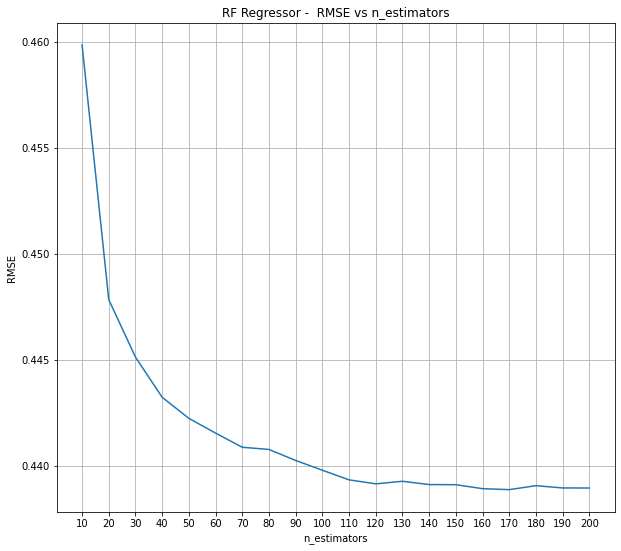

In [98]:
# from matplotlib.pyplot import figure
# figure(figsize=(10, 9), dpi=80)
plt.rcParams["figure.figsize"] = (10,9)
plt.plot(rmse_scores.keys(), rmse_scores.values())
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.xticks(list(rmse_scores.keys()))
plt.grid()
plt.title('RF Regressor -  RMSE vs n_estimators')

**After which value of `n_estimators` does RMSE stop improving?**

- 10
- 50
- 70
- **120**

## **Question 4**

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [86]:
n_range_depth = [10, 15, 20, 25]
n_range = np.arange(10,201,10)

seed = 1
scores = []

for i in n_range_depth:
    for v in n_range:
        rf = RandomForestRegressor(max_depth=i, n_estimators=v, random_state=seed, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred_val = rf.predict(X_val)
        rmse_v = np.sqrt(mse(y_val, y_pred_val))
        scores.append((i,v,rmse_v))


In [87]:
cols = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=cols)
df_scores.head(3)

,max_depth,n_estimators,rmse
0,10,10,0.445596
1,10,20,0.442033
2,10,30,0.441392


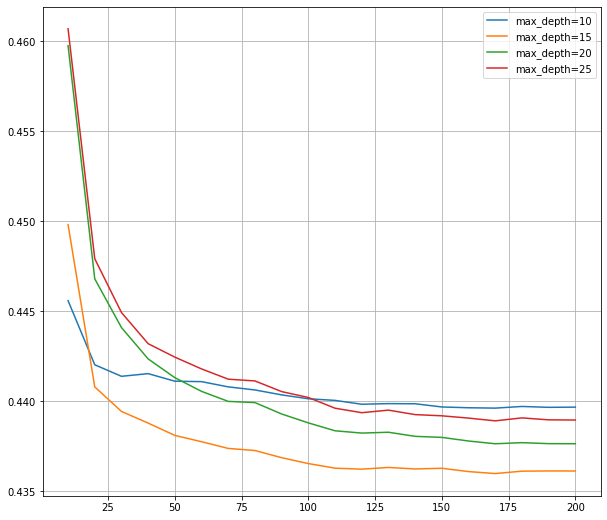

In [97]:
for i in [10, 15, 20, 25]:
    df_temp = df_scores[df_scores.max_depth == i]
    plt.plot(df_temp.n_estimators, df_temp.rmse, label='max_depth=%i' % i)
    plt.rcParams["figure.figsize"] = (10,9)
plt.grid()
plt.legend()

**What's the best `max_depth`:**

* 10
* **15**
* 20
* 25

## **Bonus question (not graded):**  

Will the answer be different if we change the seed for the model?

## **Question 5**

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [102]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

numpy.ndarray

In [105]:
rf.feature_importances_

array([7.65657560e-02, 3.02638819e-02, 1.51755500e-01, 1.53475601e-01,
       5.31695975e-02, 4.47273475e-04, 1.11450114e-03, 3.40436593e-02,
       1.03414350e-03, 8.37127171e-05, 4.25185232e-02, 5.45945765e-02,
       3.91898023e-01, 4.87707077e-03, 4.15817992e-03])

In [106]:
feat_imp = [(feat, vals) for feat, vals in zip(dv_features, rf.feature_importances_)]
cols = ['features', 'feature_importance']
df_feat_importance = pd.DataFrame(feat_imp, columns=cols) 
df_feat_importance.sort_values(by='feature_importance', ascending=False, inplace=True)
df_feat_importance

,features,feature_importance
12,room_type=Entire home/apt,0.391898
3,longitude,0.153476
2,latitude,0.151756
0,availability_365,0.076566
11,reviews_per_month,0.054595
4,minimum_nights,0.053170
10,number_of_reviews,0.042519
7,neighbourhood_group=Manhattan,0.034044
1,calculated_host_listings_count,0.030264
13,room_type=Private room,0.004877


**What's the most important feature?** 

* neighbourhood_group=Manhattan
* **`room_type=Entire home/apt`**  	
* longitude
* latitude

## **Question 6**

Now let's train an XGBoost model!  
For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

In [ ]:
# Install XGBoost
# !pip3 install xgboost
import xgboost as xgb

In [ ]:
# Create DMatrix for train and validation

In [ ]:
# Create a watchlist

In [ ]:
# Train a model

**Which eta leads to the best RMSE score on the validation dataset?**

* 0.3
* 0.1
* 0.01

## Submit the results

Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.